WebIO._IJuliaInit()

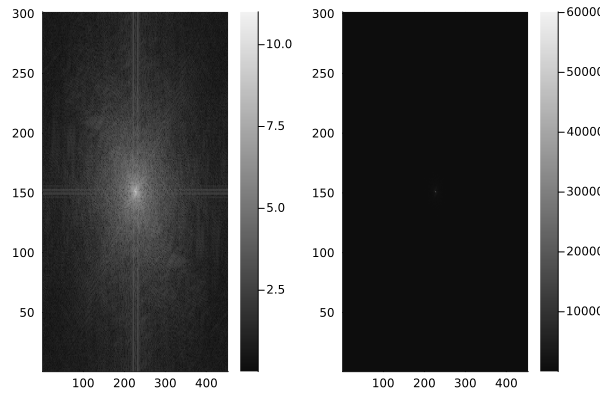

In [1]:
include("utils.jl")
using .Utils
using FFTW
using Plots
using Images
using TestImages
using Interact

flower1 = load("flower01.png");
flower2 = load("flower02.png");
flower1=  channelview(float.(flower1));
flower2=  channelview(float.(flower2));

flower1_fft=fftshift(fft(flower1))
flower2_fft=fftshift(fft(flower2))
p1=heatmap(log.(1 .+ abs.(flower1_fft)) ,color=:grays)
p2=heatmap( abs.(flower1_fft) ,color=:grays,clim=(minimum(abs.(flower1_fft)),maximum(abs.(flower1_fft))))

plot(p1,p2)


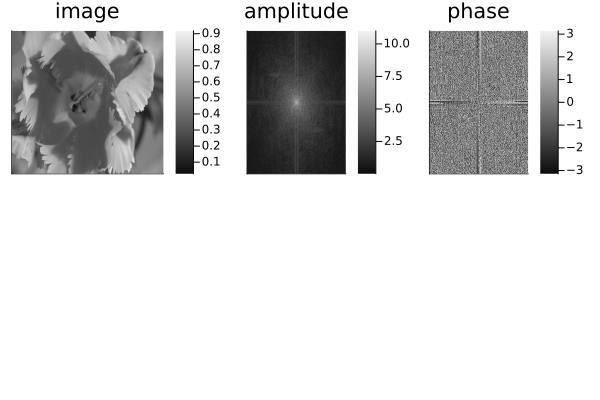

In [2]:
fftimg(flower1)

150.5
0.08256210524381377

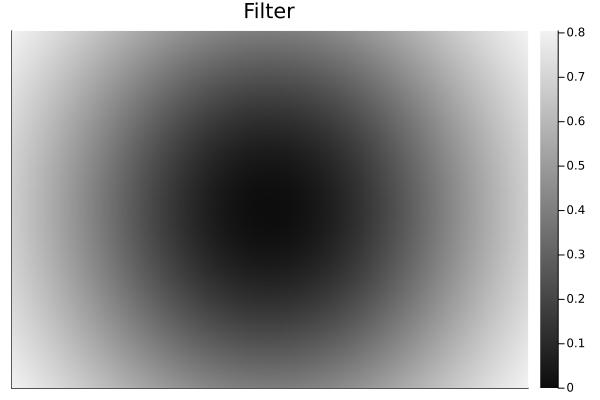

In [36]:
function gauss_filter(img)
    G=zeros(size(img))
    sigma=size(img,1)/2
    println(sigma)
    channelview(float.(flower1));
    for i in eachindex(view(img,1:size(img,1),1:size(img,2)))
        diff_x=i[2]-size(img,2)/2
        diff_y=i[1]-size(img,1)/2
        x_squared= diff_x^2 + diff_y^2
        exponent= -x_squared/(2*sigma^2)
        G[i]= exp(exponent)
    end
    m=maximum(G)  
    G=G./m
    return G
end
G=gauss_filter(flower1)
flower1_spectrum_filtered = flower1_fft.*(1 .-G)
flower1_filtered =ifft(flower1_spectrum_filtered)
print(maximum(imag.(flower1_filtered)))
#filter=heatmap(log.(1 .+1 .-G),color=:grays, xticks=false, yticks=false, title="Filter")
filter=heatmap((1 .-G),color=:grays, xticks=false, yticks=false, title="Filter")


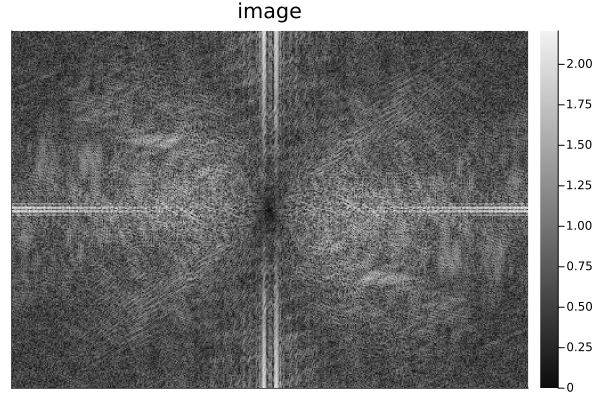

In [37]:
plot(heatmap(log.(1 .+ abs.(flower1_spectrum_filtered)), color=:grays, xticks=false, yticks=false, title="image"))

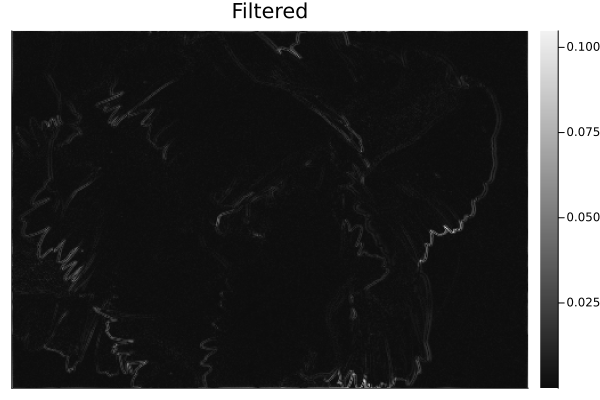

In [38]:
filtered_img=heatmap(abs.(flower1_filtered),color=:grays, xticks=false, yticks=false, title="Filtered")

In [39]:
G=gauss_filter(flower2)

flower2_spectrum_filtered = flower2_fft.*(1 .-G)
flower2_filtered =ifft(flower2_spectrum_filtered)
print(maximum(imag.(flower2_filtered)))


150.5
0.03454068292826298

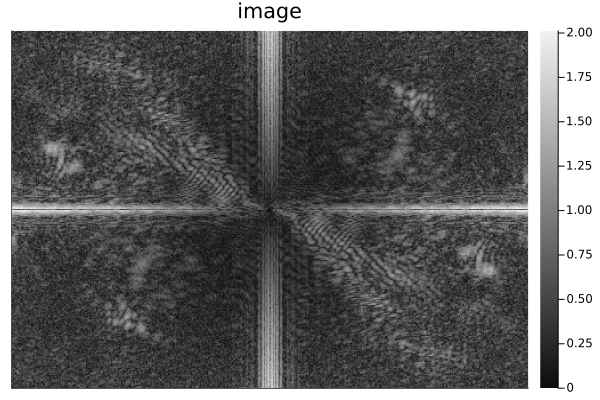

In [40]:
plot(heatmap(log.(1 .+ abs.(flower2_spectrum_filtered)), color=:grays, xticks=false, yticks=false, title="image"))

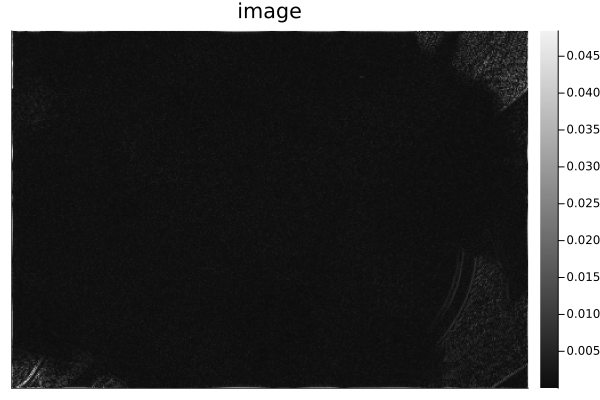

In [41]:
plot(heatmap(abs.(flower2_filtered), color=:grays, xticks=false, yticks=false, title="image"))

In [43]:
function energy(img_spectrum)
    return sum(abs.(img_spectrum).^2)/length(img_spectrum)
end
println("Energy after filter flower1: ",energy(flower1_spectrum_filtered))      
println("Energy after filter flower2: ",energy(flower2_spectrum_filtered))  
        

Energy after filter flower1: 2.1226314072446963
Energy after filter flower2: 0.7615340796887047
